## MDS Thesis
#### 03. Visualize results

<br>
<hr style="opacity: 0.5">

### Setup

In [2]:
# load libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

In [3]:
# check wd
os.getcwd()

#os.chdir("/Users/varvarailyina/hertie/mds_thesis/scripts/")

'/Users/varvarailyina/hertie/mds_thesis/scripts'

In [4]:
# load `df_clean` data
df_clean = pd.read_csv("../data/out/df_clean.csv")

In [5]:
# top 10 scores
df_top10 = df_clean.sort_values(by='score', ascending=False).head(10)

# bottom 10 scores
df_bottom10 = df_clean.sort_values(by='score', ascending=True).head(10)

<hr style="opacity: 0.5">

### Visualize results

-- *Distribution of intensity scores*

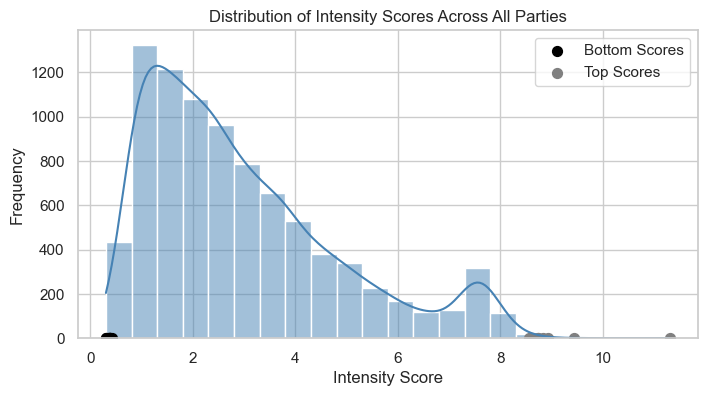

In [6]:
# set style for seaborn plots
sns.set(style="whitegrid")

# plot distribution of scores
plt.figure(figsize=(8, 4))
sns.histplot(df_clean['score'], kde=True, color="steelblue", binwidth=0.5)
plt.scatter(df_bottom10['score'], [0]*len(df_bottom10), color='black', s=50, label='Bottom Scores')
plt.scatter(df_clean.sort_values(by='score', ascending=False).head(10)['score'], [0]*10, color='grey', s=50, label='Top Scores')
plt.title('Distribution of Intensity Scores Across All Parties')
plt.xlabel('Intensity Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

-- *Most / Least extreme press releases*

In [7]:
# top 10
print(df_top10['text'])

# bottom 10
print(df_bottom10['text'])

2439    Weil die französische Regierung am Samstag ern...
1255    Zur erneuten Sammelabschiebung nach Afghanista...
1831    Zur Beratung des Haushaltes des Beauftragten d...
4723    Zur Verleihung des Friedensnobelpreises an Lib...
1683    Zur Zuspitzung der innenpolitischen Situation ...
6857    Zu den heute von der Hans-Böckler-Stiftung vor...
1357    Zur Debatte des SPD-Antrags Kultur für alle! F...
7859    Anlässlich der heutigen Öffentlichen Anhörung ...
6376    Zu Berichten, die Bundesregierung plane Kompen...
3284    Zu dem heute vom Bundeskabinett beschlossenen ...
Name: text, dtype: object
442     In der Antwort auf unsere Anfrage musste das B...
2781    Zu den Forderungen von EU-Energiekommissar Gün...
2275    Die geplanten Vereinheitlichungen in der EU-As...
4547    Elvira Drobinski-Weiß, verbraucherpolitische S...
4177    „Es ist höchste Zeit für eine Lohnoffensive, d...
7023    Es ist ein Skandal, dass die neu prognostizier...
7867    Zur Verabschiedung des Berichts der Pr

-- *Changes over time by party*

In [8]:
# make sure 'month_start' is in datetime format
df_clean = df_clean.copy()
df_clean['month_start'] = pd.to_datetime(df_clean['month_start'])

# define party colors
party_colors = {
    'CDU/CSU': '#000000',  # Black
    'SPD': '#E3000F',      # Red
    'Greens': '#46962B', # Green
    'FDP': '#FFED00',      # Yellow
    'Left': '#8C3473', # Purple
    'AfD': '#009EE0'       # Blue
}

-- *Emotional intensity scores by party per month*

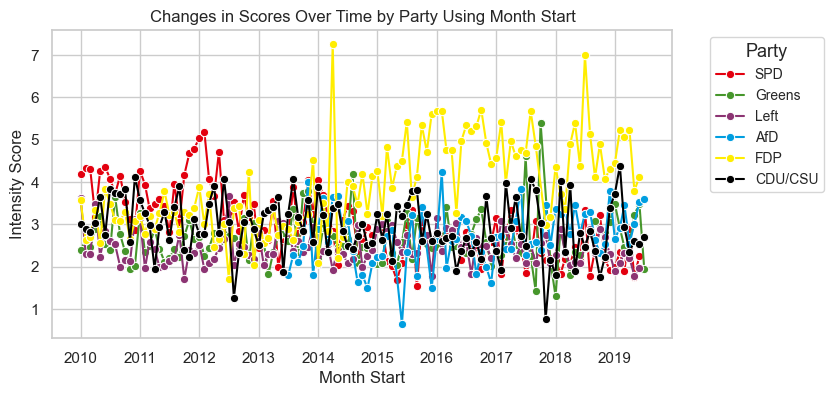

In [9]:
# line plot of scores by party over time using 'month_start'
plt.figure(figsize=(8, 4))
sns.lineplot(data=df_clean, x='month_start', y='score', hue='party', linewidth=1.5, marker='o', palette=party_colors, errorbar=None)
plt.title('Changes in Scores Over Time by Party Using Month Start')
plt.xlabel('Month Start')
plt.ylabel('Intensity Score')
plt.legend(title='Party', title_fontsize='13', fontsize='10', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

-- *Emotional intensity scores by party for every 2 months*

/var/folders/89/wy_4fk_j4wsfym9x7s_1s5jc0000gn/T/ipykernel_50645/831848263.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouped = df_clean.groupby(['party', pd.Grouper(key='month_start', freq='2M')])[numeric_cols].mean()


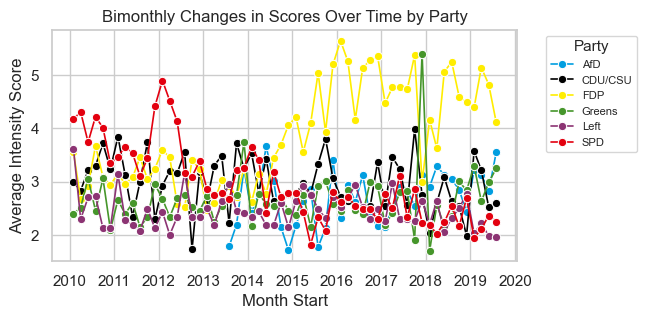

In [10]:
# only process numeric columns
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()

# calculate mean for each group (by party + every 2 months)
grouped = df_clean.groupby(['party', pd.Grouper(key='month_start', freq='2M')])[numeric_cols].mean()

# reset the index (to make 'month_start' and 'party' columns again)
grouped.reset_index(inplace=True)

# line plot
plt.figure(figsize=(6, 3))
sns.lineplot(data=grouped, x='month_start', y='score', hue='party', linewidth=1.2, marker='o', palette=party_colors)

plt.title('Bimonthly Changes in Scores Over Time by Party')
plt.xlabel('Month Start')
plt.ylabel('Average Intensity Score')
plt.legend(title='Party', title_fontsize='11', fontsize='8', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

-- *Emotional intensity scores by party for every 3 months*

/var/folders/89/wy_4fk_j4wsfym9x7s_1s5jc0000gn/T/ipykernel_50645/3992535779.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  quarterly_scores = df_clean.groupby(['party', pd.Grouper(key='month_start', freq='3M')])[numeric_cols].mean()


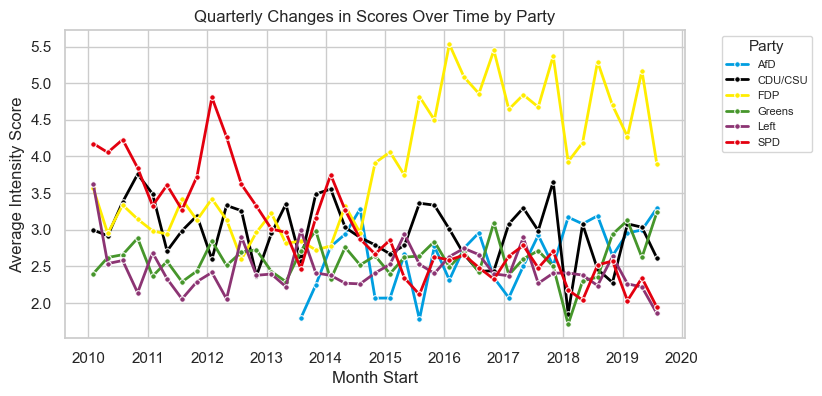

In [11]:
# only process numeric columns
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()

# calculate mean for each group (by party + every 3 months)
quarterly_scores = df_clean.groupby(['party', pd.Grouper(key='month_start', freq='3M')])[numeric_cols].mean()

# reset the index (to make 'month_start' and 'party' columns again)
quarterly_scores.reset_index(inplace=True)

# line plot
plt.figure(figsize=(8, 4))
lineplot = sns.lineplot(data=quarterly_scores, x='month_start', y='score', hue='party', style='party', palette=party_colors, linewidth=2, marker='o', dashes=False)

# set marker size within lines
for line in lineplot.get_lines():
    line.set_markersize(4)  # marker size

plt.title('Quarterly Changes in Scores Over Time by Party')
plt.xlabel('Month Start')
plt.ylabel('Average Intensity Score')
plt.legend(title='Party', title_fontsize='11', fontsize='8', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

-- *Emotional intensity scores by party for every 6 months*

/var/folders/89/wy_4fk_j4wsfym9x7s_1s5jc0000gn/T/ipykernel_50645/3393815458.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  semiannual_scores = df_clean.groupby(['party', pd.Grouper(key='month_start', freq='6M')])[numeric_cols].mean()


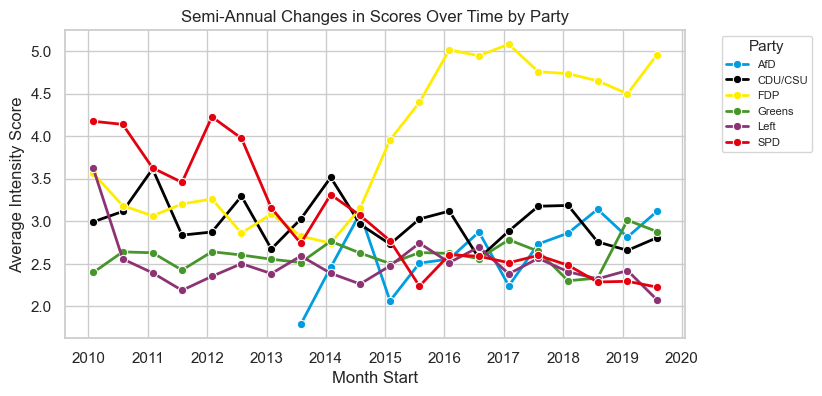

In [12]:
# only process numeric columns
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()

# calculate mean for each group (by party + for every 6 months)
semiannual_scores = df_clean.groupby(['party', pd.Grouper(key='month_start', freq='6M')])[numeric_cols].mean()

# reset the index (to make 'month_start' and 'party' columns again)
semiannual_scores.reset_index(inplace=True)

# line plot
plt.figure(figsize=(8, 4))
sns.lineplot(data=semiannual_scores, x='month_start', y='score', hue='party', linewidth=2, marker='o', palette=party_colors)
plt.title('Semi-Annual Changes in Scores Over Time by Party')
plt.xlabel('Month Start')
plt.ylabel('Average Intensity Score')
plt.legend(title='Party', title_fontsize='11', fontsize='8', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

-- *Summary statistics by party*

/var/folders/89/wy_4fk_j4wsfym9x7s_1s5jc0000gn/T/ipykernel_50645/713699262.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='party', y='score', palette=party_colors)


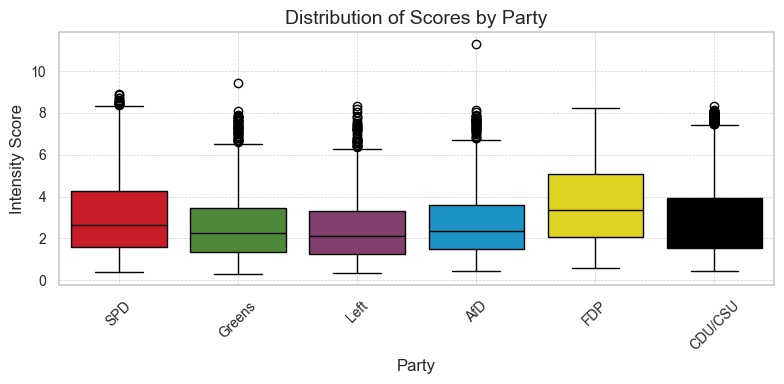

In [13]:
# box plot for scores by party
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_clean, x='party', y='score', palette=party_colors)
plt.title('Distribution of Scores by Party', fontsize=14)
plt.xlabel('Party', fontsize=12)
plt.ylabel('Intensity Score', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5)  # Adding a light grid for better readability
plt.tight_layout()  # Adjust layout to avoid cutting off label texts
plt.show()

In [14]:
# score averages by party
average_scores_by_party = df_clean.groupby('party')['score'].mean()
print(average_scores_by_party)

party
AfD        2.848925
CDU/CSU    3.003719
FDP        3.734793
Greens     2.612435
Left       2.449192
SPD        3.231764
Name: score, dtype: float64


-- *Count and share of press releases over time*

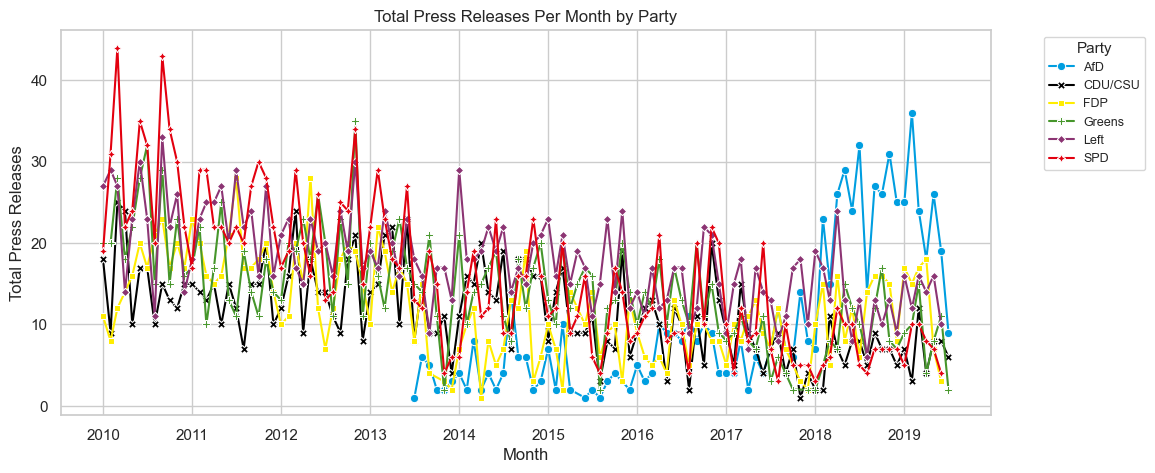

In [15]:
# Assuming 'df_tmp' DataFrame exists and 'date' column is present
df_clean['date'] = pd.to_datetime(df_clean['date'])
df_clean['month'] = df_clean['date'].dt.to_period('M').dt.start_time

# Calculate the total number of press releases per party per month
monthly_counts = df_clean.groupby(['party', 'month']).size().reset_index(name='total_releases')

# Calculate the total number of press releases per month for all parties
total_monthly_counts = df_clean.groupby('month').size().reset_index(name='total_monthly_releases')

# Merge the total monthly counts back into the monthly_counts dataframe
monthly_counts = monthly_counts.merge(total_monthly_counts, on='month')

# Calculate the share of total releases for each party per month
monthly_counts['share_of_releases'] = monthly_counts['total_releases'] / monthly_counts['total_monthly_releases']

# Plot Total Press Releases Over Time by Party
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_counts, x='month', y='total_releases', hue='party', style='party', 
             palette=party_colors, markers=True, dashes=False)
plt.title('Total Press Releases Per Month by Party')
plt.xlabel('Month')
plt.ylabel('Total Press Releases')
plt.legend(title='Party', title_fontsize='11', fontsize='9', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

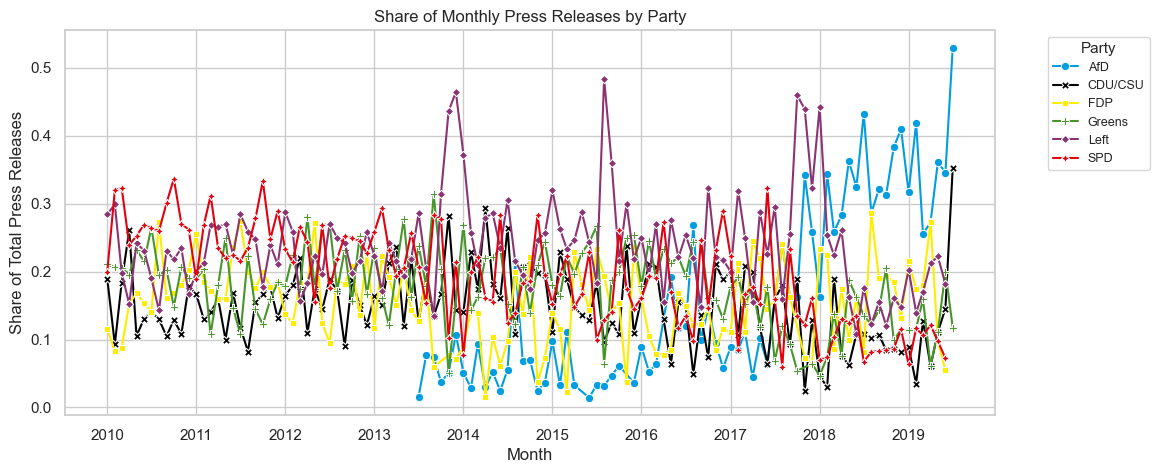

In [15]:
# Plot Share of Press Releases Over Time by Party (share relative to other parties)
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_counts, x='month', y='share_of_releases', hue='party', style='party',
             palette=party_colors, markers=True, dashes=False)
plt.title('Share of Monthly Press Releases by Party')
plt.xlabel('Month')
plt.ylabel('Share of Total Press Releases')
plt.legend(title='Party', title_fontsize='11', fontsize='9', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

-- *Share of each party's contribution to total score over time*

/var/folders/89/wy_4fk_j4wsfym9x7s_1s5jc0000gn/T/ipykernel_50645/192083356.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  quarterly_scores = df_clean.groupby(['party', pd.Grouper(key='month_start', freq='3M')])['score'].sum().reset_index(name='party_score')
/var/folders/89/wy_4fk_j4wsfym9x7s_1s5jc0000gn/T/ipykernel_50645/192083356.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  total_scores_per_period = df_clean.groupby(pd.Grouper(key='month_start', freq='3M'))['score'].sum().reset_index(name='total_score')


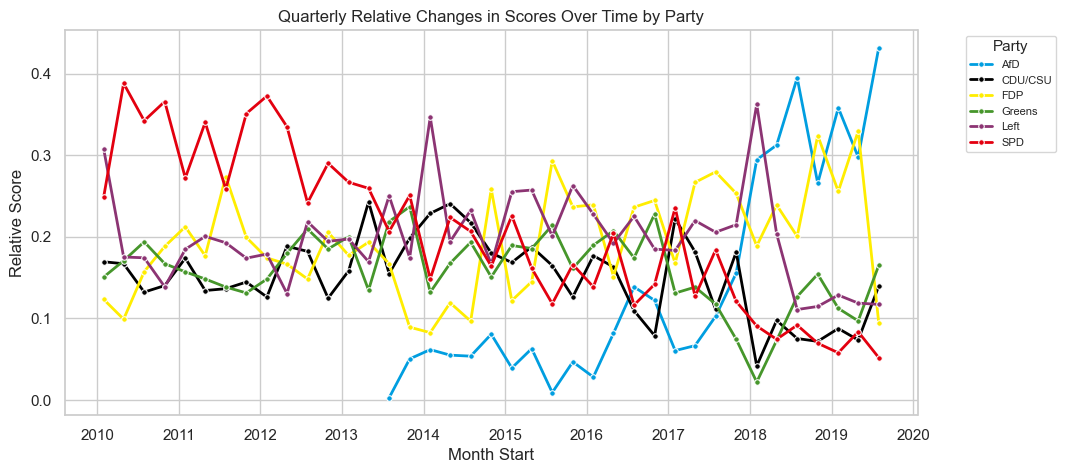

In [16]:
# Convert 'date' to datetime format if not already done
df_clean['date'] = pd.to_datetime(df_clean['date'])

# Set the date to a monthly period, assuming 'month_start' needs to be calculated
df_clean['month_start'] = df_clean['date'].dt.to_period('M').dt.start_time

# Calculate the total score by party and every 3 months
quarterly_scores = df_clean.groupby(['party', pd.Grouper(key='month_start', freq='3M')])['score'].sum().reset_index(name='party_score')

# Calculate the total score across all parties for each period
total_scores_per_period = df_clean.groupby(pd.Grouper(key='month_start', freq='3M'))['score'].sum().reset_index(name='total_score')

# Merge the total scores back to the quarterly scores DataFrame
quarterly_scores = quarterly_scores.merge(total_scores_per_period, on='month_start')

# Calculate the relative score as the share of the total
quarterly_scores['relative_score'] = quarterly_scores['party_score'] / quarterly_scores['total_score']

# Plotting
plt.figure(figsize=(11, 5))
lineplot = sns.lineplot(data=quarterly_scores, x='month_start', y='relative_score', hue='party', style='party', 
                        palette=party_colors, linewidth=2, marker='o', dashes=False)

# Set marker size within lines
for line in lineplot.get_lines():
    line.set_markersize(4)  # marker size

plt.title('Quarterly Relative Changes in Scores Over Time by Party')
plt.xlabel('Month Start')
plt.ylabel('Relative Score')
plt.legend(title='Party', title_fontsize='11', fontsize='8', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

-- *IDK what this is*

/var/folders/89/wy_4fk_j4wsfym9x7s_1s5jc0000gn/T/ipykernel_50645/3827292609.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  quarterly_scores = df_tmp.groupby(['party', pd.Grouper(key='month_start', freq='3M')])['score'].sum().reset_index(name='party_score')
/var/folders/89/wy_4fk_j4wsfym9x7s_1s5jc0000gn/T/ipykernel_50645/3827292609.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  total_scores_per_period = df_tmp.groupby(pd.Grouper(key='month_start', freq='3M'))['score'].sum().reset_index(name='total_score')


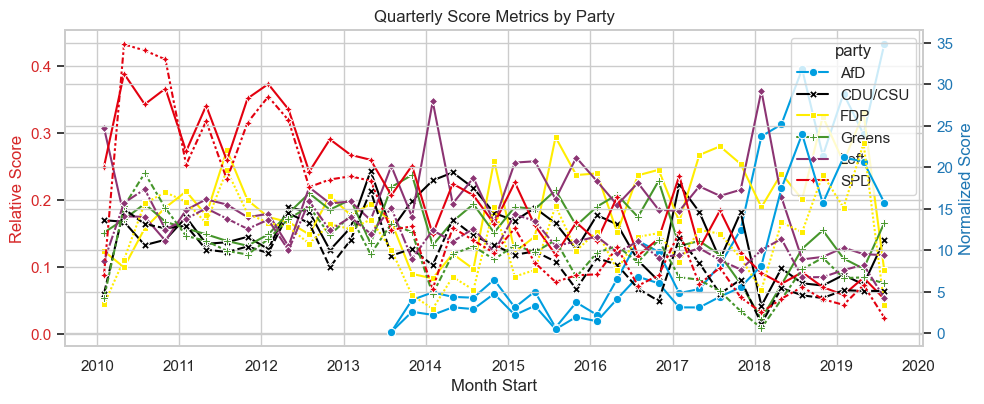

In [17]:
# try some stuff out
df_tmp = df_clean.copy()

# Convert 'date' to datetime format if not already done
df_tmp['date'] = pd.to_datetime(df_tmp['date'])
df_tmp['month_start'] = df_tmp['date'].dt.to_period('M').dt.start_time

# Calculate the total and maximum scores for normalization
quarterly_scores = df_tmp.groupby(['party', pd.Grouper(key='month_start', freq='3M')])['score'].sum().reset_index(name='party_score')
total_scores_per_period = df_tmp.groupby(pd.Grouper(key='month_start', freq='3M'))['score'].sum().reset_index(name='total_score')
max_score = df_tmp['score'].max()

# Merge and calculate metrics
quarterly_scores = quarterly_scores.merge(total_scores_per_period, on='month_start')
quarterly_scores['relative_score'] = quarterly_scores['party_score'] / quarterly_scores['total_score']
quarterly_scores['normalized_score'] = quarterly_scores['party_score'] / max_score

# Plotting relative and normalized scores
fig, ax1 = plt.subplots(figsize=(10, 4))

# Relative scores
color = 'tab:red'
ax1.set_xlabel('Month Start')
ax1.set_ylabel('Relative Score', color=color)
lineplot1 = sns.lineplot(data=quarterly_scores, x='month_start', y='relative_score', hue='party', style='party', 
                         palette=party_colors, markers=True, dashes=False, ax=ax1)
ax1.tick_params(axis='y', labelcolor=color)

# Normalized scores
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Normalized Score', color=color)  # we already handled the x-label with ax1
lineplot2 = sns.lineplot(data=quarterly_scores, x='month_start', y='normalized_score', hue='party', style='party',
                         palette=party_colors, markers=True, dashes=True, ax=ax2, legend=False)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Quarterly Score Metrics by Party')
plt.show()

-- *Calculate PCA*

Data types after filtering: id                   int64
parlgov_id         float64
calendar_week        int64
issue_multi          int64
issue_mono           int64
issue              float64
issue_coder2       float64
position           float64
position_coder2    float64
cv_sample            int64
issue_ridge          int64
issue_super          int64
score              float64
dtype: object


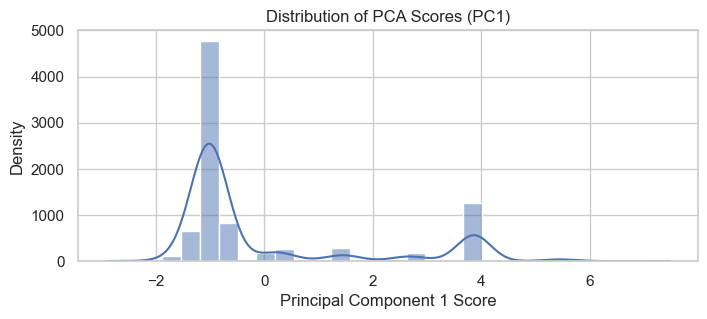

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Select only numeric columns for PCA
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
df_numeric = df_clean[numeric_cols]

print("Data types after filtering:", df_numeric.dtypes)

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df_numeric)
# Transform imputed data back into a DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=numeric_cols)

# Standardizing the numeric data after imputation
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

# Running PCA
pca = PCA(n_components=2)  # Adjust the number of components if necessary
principal_components = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Visualize the distribution of the first principal component
plt.figure(figsize=(8, 3))
sns.histplot(pca_df['PC1'], bins=30, kde=True)
plt.title('Distribution of PCA Scores (PC1)')
plt.xlabel('Principal Component 1 Score')
plt.ylabel('Density')
plt.show()

In [19]:
# Identifying a threshold using the 90th percentile
threshold = np.percentile(pca_df['PC1'], 90)
print("90th Percentile Threshold:", threshold)

90th Percentile Threshold: 3.850181507832765


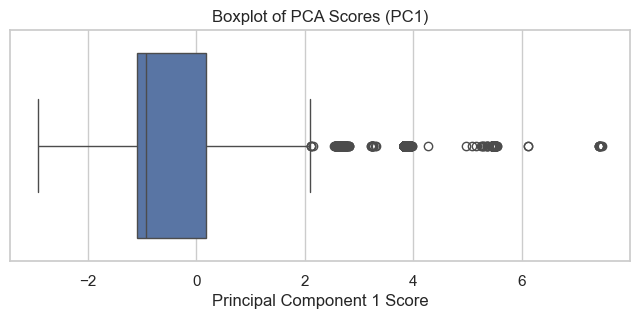

In [20]:
# Optionally, analyze further with a boxplot
plt.figure(figsize=(8, 3))
sns.boxplot(x=pca_df['PC1'])
plt.title('Boxplot of PCA Scores (PC1)')
plt.xlabel('Principal Component 1 Score')
plt.show()

The result you've obtained, indicating that the 90th percentile threshold of the first principal component (PC1) scores from PCA is approximately 3.75, provides insight into the distribution of your data along this principal component. Here’s what this information tells you and how you can interpret it in a broader context:

#### Interpretation of PCA Results and 90th Percentile Threshold:

1. Distribution of PC1: The distribution of scores along the first principal component (PC1) tells you about the variance in your dataset that is captured by this component. PC1 is the direction in which the data varies the most.
2. 90th Percentile Meaning:

- High-Value Influence: The 90th percentile threshold at 3.75 means that 90% of the data have a PC1 score below this value, and 10% have scores above it. This threshold can be used to identify data points that have exceptionally high values along PC1, which might represent outliers or highly influential observations in the context of your dataset.
- Identifying Outliers/Key Features: If PC1 captures a significant feature of the dataset, values exceeding this 90th percentile might be particularly important or worthy of further investigation. These could be considered outliers or exceptional cases depending on the nature of your data and what PC1 represents.

3. Insights into Data Structure:

- Variance Explanation: Since PCA organizes the components in order of decreasing variance explained, PC1 accounts for the highest variance in the dataset. The threshold tells you about the point beyond which the most extreme contributions to this variance occur.
- Potential Applications: In practical terms, if PC1 corresponds to an interpretable feature (like intensity of a certain behavior in psychological data, financial expenditure in economic data, etc.), those scoring above the threshold are significantly higher in this feature compared to the typical observations.

4. Strategic Decisions:

- Segmentation and Targeting: In business or research, you might use this threshold to segment the data or focus on a specific group of data points that behave differently from the majority.
- Risk Management and Anomaly Detection: In fields like finance or cybersecurity, identifying such thresholds helps in pinpointing risky or anomalous activities.

##### Next Steps with Your Analysis:

- Investigate Outliers: Consider examining the observations that have PC1 scores above this threshold to understand why they are different. Are they errors, extreme cases, or do they represent a significant but rare phenomenon?
- Further Statistical Analysis: You might want to perform additional analyses on this subset of data or use the threshold to define a feature in machine learning models, such as a binary indicator for "high" vs. "normal" PC1 scores.
- Review Other Components: Don't forget to consider other principal components as well. Sometimes the first component captures a large portion of the variance, but subsequent components can provide additional valuable insights, especially if they represent different underlying processes or features.

This percentile threshold gives you a quantifiable metric to understand and describe your data’s behavior in the most variant direction defined by PCA, providing a basis for further detailed analysis and decision-making.

-- *Share of emotionally intense press releases per party based on PCA threshold*

/var/folders/89/wy_4fk_j4wsfym9x7s_1s5jc0000gn/T/ipykernel_50645/2082606591.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouped = df_clean.groupby(['party', pd.Grouper(key='month_start', freq='3M')])


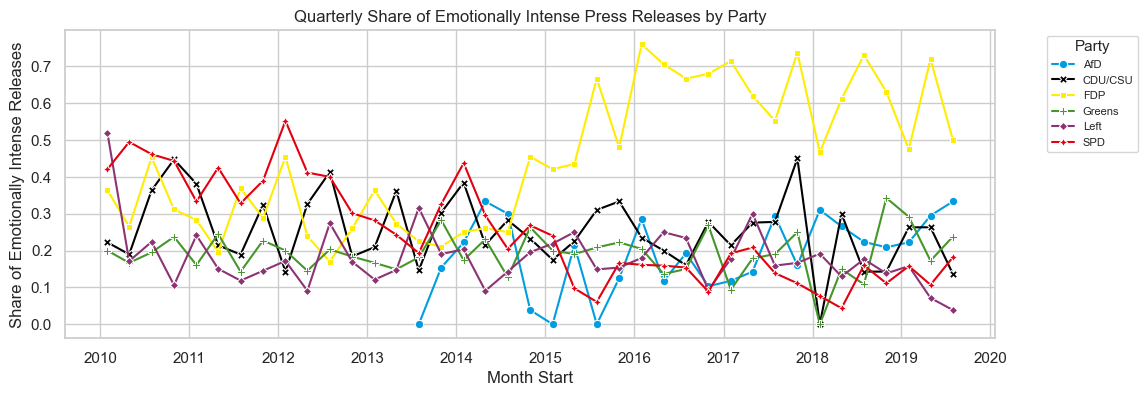

In [21]:
## compare each party with itself over time

df_clean['date'] = pd.to_datetime(df_clean['date'])
df_clean['month_start'] = df_clean['date'].dt.to_period('M').dt.start_time

# Define a threshold for emotional intensity (adjust this based on your scoring system)
intensity_threshold = 3.850181507832765  # PCA-based threshold from code above

# Flag emotionally intense press releases
df_clean['is_intense'] = (df_clean['score'] >= intensity_threshold).astype(int)

# Calculate total and intense press releases by party and period
grouped = df_clean.groupby(['party', pd.Grouper(key='month_start', freq='3M')])
total_releases = grouped['score'].count().reset_index(name='total_releases')
intense_releases = grouped['is_intense'].sum().reset_index(name='intense_releases')

# Merge and calculate the proportion of intense releases
intense_data = total_releases.merge(intense_releases, on=['party', 'month_start'])
intense_data['intense_share'] = intense_data['intense_releases'] / intense_data['total_releases']

# Plotting
plt.figure(figsize=(12, 4))
lineplot = sns.lineplot(data=intense_data, x='month_start', y='intense_share', hue='party', style='party', 
                        palette=party_colors, markers=True, dashes=False)

plt.title('Quarterly Share of Emotionally Intense Press Releases by Party')
plt.xlabel('Month Start')
plt.ylabel('Share of Emotionally Intense Releases')
plt.legend(title='Party', title_fontsize='11', fontsize='8', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

<hr style="opacity: 0.5">

-- *Emotional intensity by issue*

In [31]:
# plot distribution of press releases by issue

# specify issue labels
issue_labels = {
    1: "Macroeconomics",
    2: "Civil Rights",
    3: "Health",
    4: "Agriculture",
    5: "Labor",
    6: "Education",
    7: "Environment",
    8: "Energy",
    9: "Immigration",
    10: "Transportation",
    12: "Law and Crime",
    13: "Social Welfare",
    14: "Housing",
    15: "Domestic Commerce",
    16: "Defense",
    17: "Technology",
    18: "Foreign Trade",
    191: "International Affairs",
    192: "European Integration",
    20: "Government Operations",
    23: "Culture"
}

# add labels to issues
df_clean['issue_label'] = df_clean['issue_mono'].map(issue_labels)

# number of press releases per issue category
#issue_counts = df_clean['issue_label'].value_counts().sort_index()
issue_counts = df_clean['issue_label'].value_counts().sort_values(ascending=False)

print(issue_counts)

issue_label
International Affairs    1167
Civil Rights              675
Law and Crime             610
Labor                     578
European Integration      552
Domestic Commerce         550
Immigration               498
Macroeconomics            480
Energy                    475
Education                 467
Defense                   404
Health                    386
Agriculture               336
Government Operations     327
Transportation            296
Environment               266
Social Welfare            247
Technology                175
Housing                   143
Foreign Trade              98
Culture                    70
Name: count, dtype: int64


/var/folders/89/wy_4fk_j4wsfym9x7s_1s5jc0000gn/T/ipykernel_50645/3977105977.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=issue_counts.values, y=issue_counts.index, orient='h', palette='inferno')


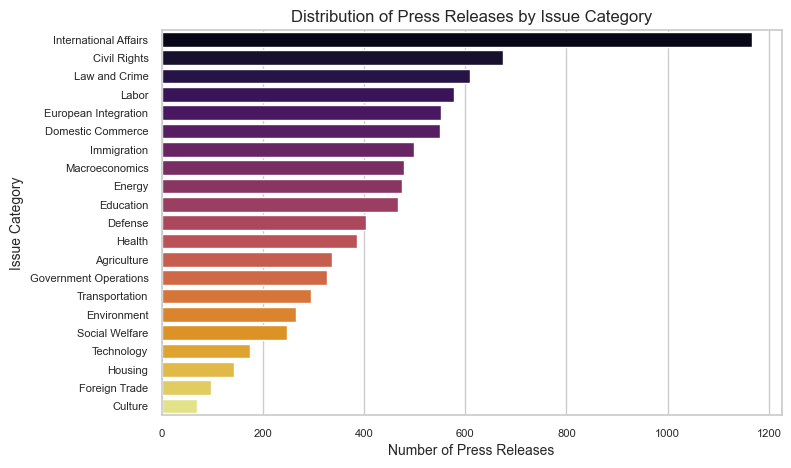

In [47]:
# plot distribution of issues
plt.figure(figsize=(8, 5))
sns.barplot(x=issue_counts.values, y=issue_counts.index, orient='h', palette='inferno')
plt.title('Distribution of Press Releases by Issue Category', fontsize=12)
plt.xlabel('Number of Press Releases', fontsize=10)
plt.ylabel('Issue Category', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

In [93]:
df_issue = df_clean[df_clean['issue_mono'] == 191]  # international affairs
#df_issue = df_clean[df_clean['issue_mono'] == 9]  # immigration
#df_issue = df_clean[df_clean['issue_mono'] == 2]  # civil rights

/var/folders/89/wy_4fk_j4wsfym9x7s_1s5jc0000gn/T/ipykernel_50645/2730246990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_issue['month_start'] = pd.to_datetime(df_issue['month_start'])


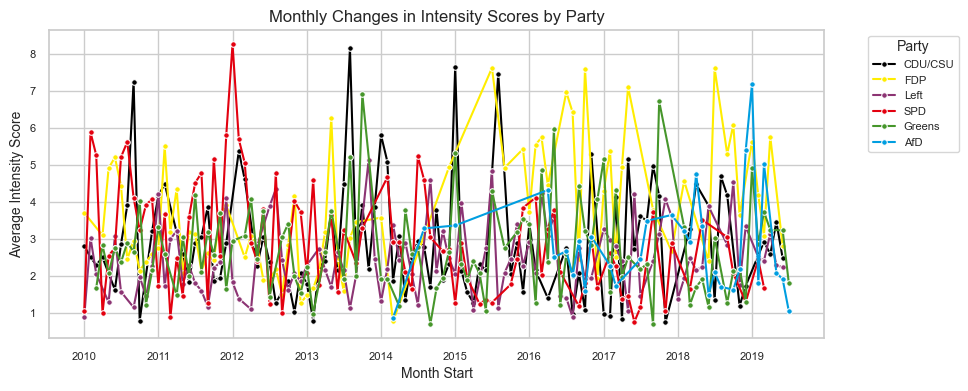

In [94]:
# Convert 'month_start' to datetime if it isn't already
df_issue['month_start'] = pd.to_datetime(df_issue['month_start'])

# Calculate the mean score for each party each month
df_mean_scores = df_issue.groupby(['month_start', 'party']).score.mean().reset_index()

# Use a simpler color palette if needed or ensure 'party_colors' is well defined
# palette = sns.color_palette("husl", df_mean_scores['party'].nunique())

plt.figure(figsize=(10, 4))
#sns.lineplot(data=df_mean_scores, x='month_start', y='score', hue='party', linewidth=2, marker='o', palette=party_colors)

lineplot = sns.lineplot(data=df_mean_scores, x='month_start', y='score', hue='party', linewidth=1.5, marker='o', palette=party_colors)

# Set marker size within lines
for line in lineplot.get_lines():
    line.set_markersize(4)  # marker size

# Set plot title and labels
plt.title('Monthly Changes in Intensity Scores by Party', fontsize=12)
plt.xlabel('Month Start', fontsize=10)
plt.ylabel('Average Intensity Score', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Improve the legend
plt.legend(title='Party', title_fontsize='10', fontsize='8', bbox_to_anchor=(1.05, 1), loc='upper left')

# Improve date formatting on the x-axis
#plt.gcf().autofmt_xdate()  # Auto formats the dates for better readability
#plt.tight_layout()  # Adjusts plot parameters to give some breathing room

plt.show()

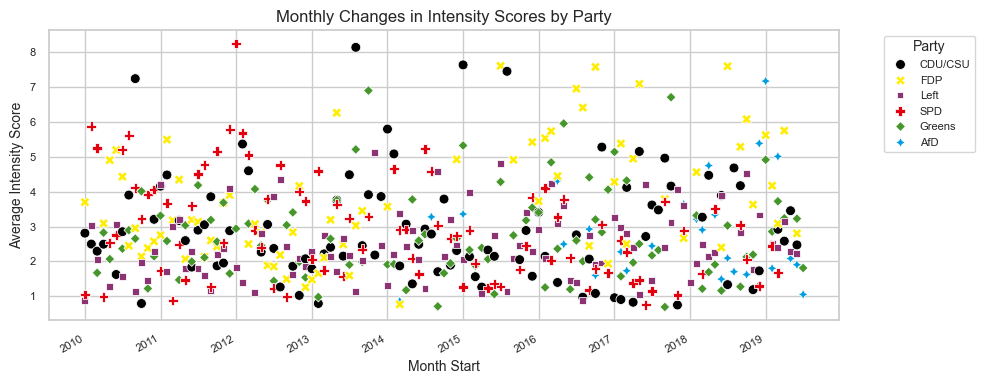

In [95]:
plt.figure(figsize=(10, 4))
sns.scatterplot(data=df_mean_scores, x='month_start', y='score', hue='party', style='party', palette=party_colors, s=50)


# Set plot title and labels
plt.title('Monthly Changes in Intensity Scores by Party', fontsize=12)
plt.xlabel('Month Start', fontsize=10)
plt.ylabel('Average Intensity Score', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Improve the legend
plt.legend(title='Party', title_fontsize='10', fontsize='8', bbox_to_anchor=(1.05, 1), loc='upper left')

# Improve date formatting on the x-axis
plt.gcf().autofmt_xdate()  # Auto formats the dates for better readability
plt.tight_layout()  # Adjusts plot parameters to give some breathing room

plt.show()

-- *Most emotionally intense issues by party*

In [66]:
# Group by 'party' and 'issue_mono', and then aggregate to find the maximum 'score'
intensity_by_party_issue = df_clean.groupby(['party', 'issue_mono'])['score'].max().reset_index()

# Rename the columns for clarity
intensity_by_party_issue.columns = ['Party', 'Issue', 'Max Intensity Score']

In [67]:
# Sort the results by 'Party' and 'Max Intensity Score' in descending order to see the most intense issues first
intensity_by_party_issue.sort_values(by=['Party', 'Max Intensity Score'], ascending=[True, False], inplace=True)

In [68]:
print(intensity_by_party_issue)

    Party  Issue  Max Intensity Score
19    AfD    191            11.301017
6     AfD      7             8.159115
8     AfD      9             8.042695
10    AfD     12             7.871281
17    AfD     20             7.844036
..    ...    ...                  ...
125   SPD    192             7.913061
115   SPD     12             7.900849
122   SPD     20             7.872233
111   SPD      7             7.793918
121   SPD     18             4.428147

[126 rows x 3 columns]
